In [1]:
#importing lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")

In [2]:
import os
cur_dir=os.getcwd()

In [3]:
#Reading dataset
ip=cur_dir+'\\big_mart_sales.csv'

In [4]:
ip_df=pd.read_csv(ip)

In [5]:
ip_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


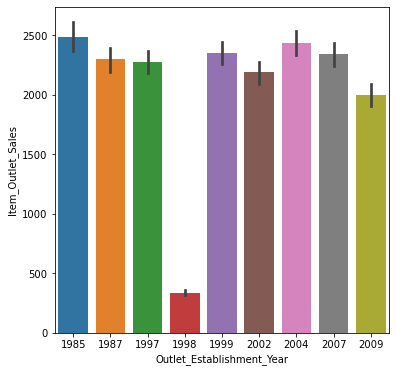

In [6]:
plt.figure(figsize=(6,6))
sns.barplot(x=ip_df['Outlet_Establishment_Year'],y=ip_df['Item_Outlet_Sales'])
plt.show()

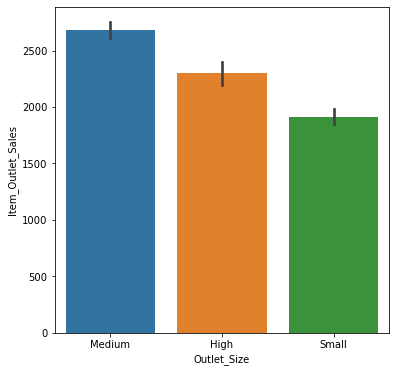

In [7]:
plt.figure(figsize=(6,6))
sns.barplot(x=ip_df['Outlet_Size'],y=ip_df['Item_Outlet_Sales'])
plt.show()

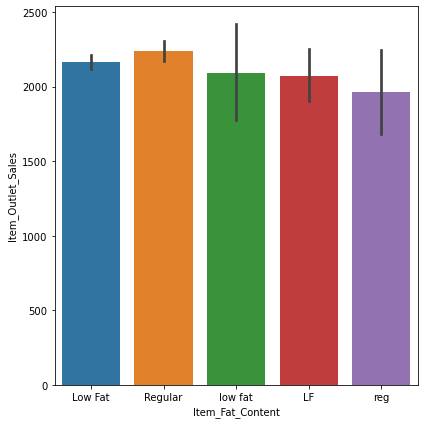

In [8]:
plt.figure(figsize=(6,6))
#sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=ip_df,order=ip_df.sort_values('Item_Outlet_Sales').Item_Fat_Content)
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=ip_df)
plt.tight_layout()
plt.show()

In [9]:
#creating categorical and numerical df

df_cat=ip_df.loc[:,ip_df.dtypes==np.object].columns
df_num=ip_df.loc[:,ip_df.dtypes!=np.object].columns

In [10]:
df_cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
df_num

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

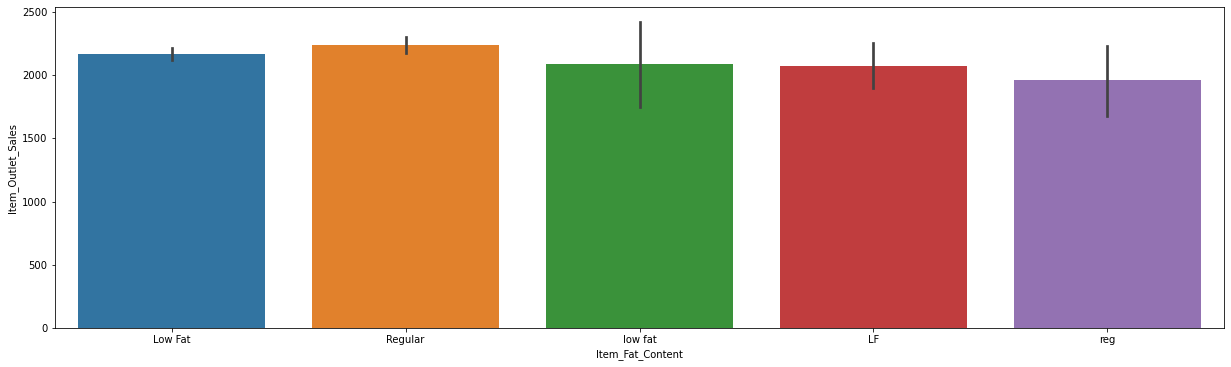

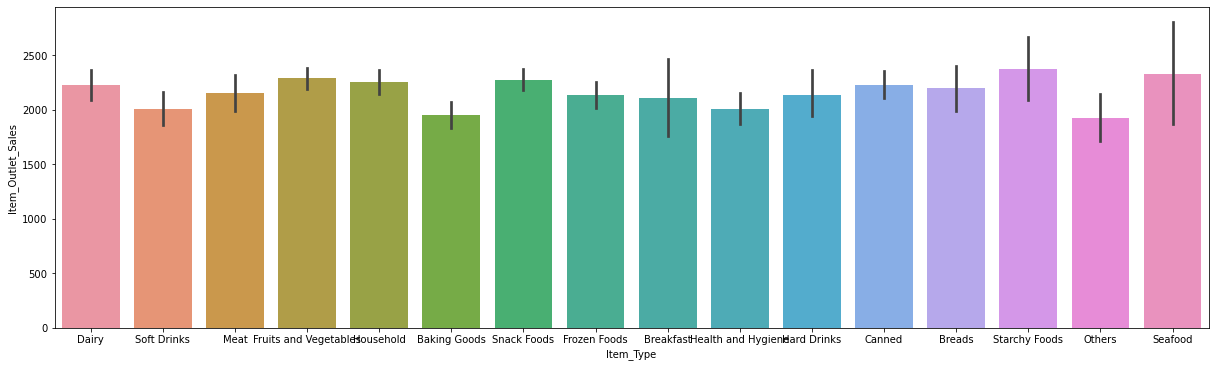

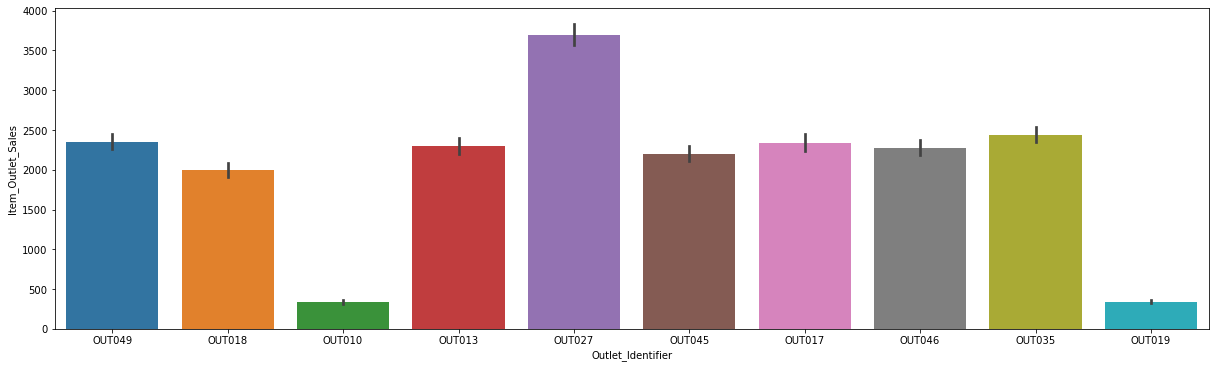

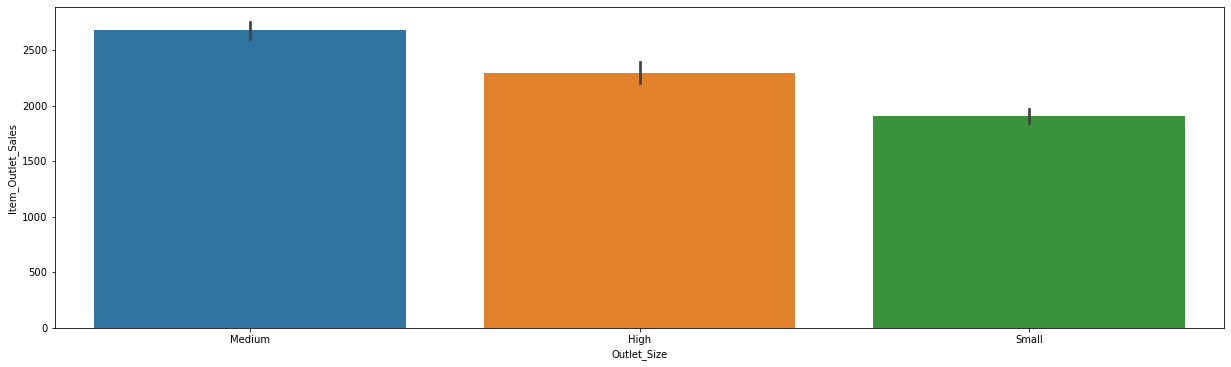

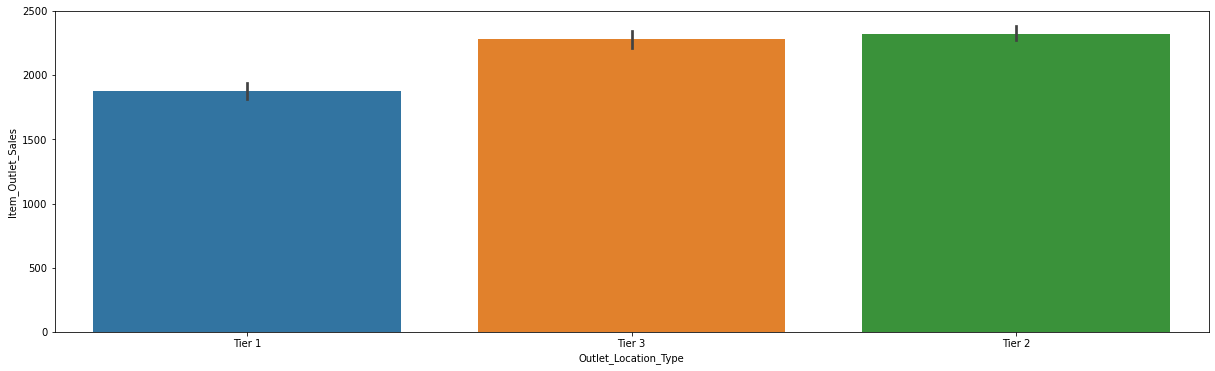

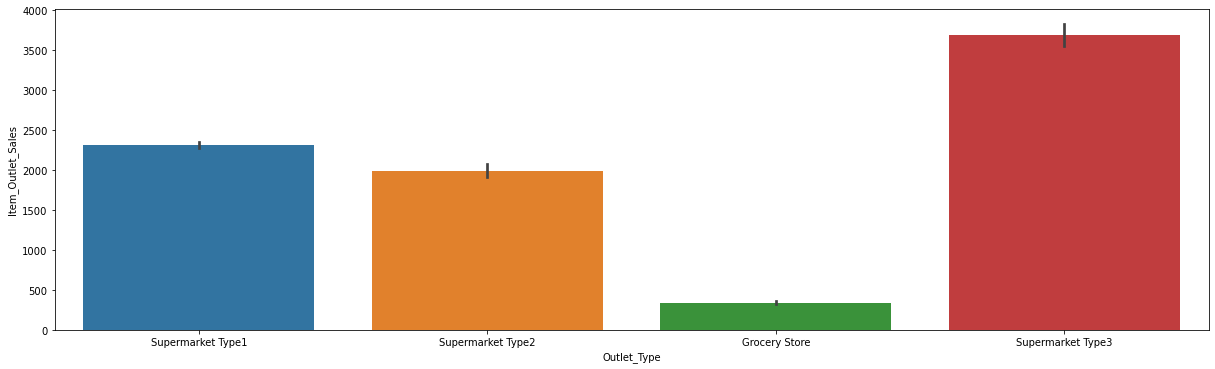

In [12]:

for each in range(1,len(df_cat)):
    plt.figure(figsize=(50,30))
    plt.subplot(6,3,each)
    sns.barplot(x=df_cat[each],y='Item_Outlet_Sales',data=ip_df)
    plt.tight_layout()
    plt.show()

In [13]:
## Category Glossary

'Item_Identifier'
'Item_Fat_Content'
'Item_Type',
'Outlet_Identifier',
'Outlet_Size',
'Outlet_Location_Type',
'Outlet_Type'


'Outlet_Type'

In [14]:
#checking missing values in the dataset

ip_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
print(ip_df.Item_Weight.mean())
print(ip_df.Item_Weight.median())
print(ip_df.Item_Weight.mode())


12.857645184136183
12.6
0    12.15
dtype: float64


In [16]:
np.floor(ip_df.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].sum())

Outlet_Type        Outlet_Size
Grocery Store      Small           179694.0
Supermarket Type1  High           2142663.0
                   Medium         2183969.0
                   Small          4386518.0
Supermarket Type2  Medium         1851822.0
Supermarket Type3  Medium         3453926.0
Name: Item_Outlet_Sales, dtype: float64

In [17]:
ip_df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [18]:
ip_df.shape

(8523, 12)

In [19]:
mode_of_Outlet_size = ip_df.pivot_table(values='Item_Outlet_Sales', index=['Outlet_Type'],columns=['Outlet_Size'],aggfunc=np.mean)

In [20]:
mode_of_Outlet_size

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,340.329723
Supermarket Type1,2298.995256,2348.354635,2358.343066
Supermarket Type2,NaN,1995.498739,NaN
Supermarket Type3,NaN,3694.038558,NaN


In [21]:
np.sort(ip_df['Outlet_Establishment_Year'].unique())

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype=int64)

In [22]:
ip_df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].sum()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          1.796941e+05
Supermarket Type1  Tier 1                Medium         2.183970e+06
                                         Small          2.118395e+06
                   Tier 2                Small          2.268123e+06
                   Tier 3                High           2.142664e+06
Supermarket Type2  Tier 3                Medium         1.851823e+06
Supermarket Type3  Tier 3                Medium         3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [23]:
ip_df.loc[(ip_df['Outlet_Type']=='Supermarket Type2') & (ip_df['Outlet_Location_Type']=='Tier 3'),'Outlet_Size'].unique()

array(['Medium'], dtype=object)

'Grocery Store' - 
    - 'Tier 3' as NAN
    - 'Tier 1' as Small

'Supermarket Type1' 
    - 'Tier 1', 'Medium', 'Small'
    - 'Tier 2', as NAN, Small
    - 'Tier 3' 'High'
    
'Supermarket Type2' - 
    - 'Tier 3' as Medium

'Supermarket Type3' - 
    - 'Tier 3' as Medium

We will map the Grocery Store missing value with 'Medium'

We observe that under Outlet_Type as 'Supermarket Type1', we already have a category as Small so will map the NA with Medium

In [24]:
#filling NaN with 'Medium'

ip_df['Outlet_Size']=ip_df['Outlet_Size'].fillna('Medium')
ip_df['Item_Weight']=ip_df['Item_Weight'].fillna(ip_df.Item_Weight.mean())

In [25]:
ip_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
ip_df.loc[(ip_df['Outlet_Type']=='Grocery Store') & (ip_df['Outlet_Location_Type']=='Tier 1'),'Outlet_Size'].unique()

array(['Small'], dtype=object)

In [27]:
#Standardizing the Item_Fat_Content feature
ip_df['Item_Fat_Content'].unique()

ip_df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [28]:
ip_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
scalar=MinMaxScaler()

num_list=[each for each in df_num if each!='Outlet_Establishment_Year']
ip_df[num_list]=scalar.fit_transform(ip_df[num_list])

In [30]:
df=ip_df.copy()

In [31]:
#Converting categorical values to numeric using labelencoder and onehot

encoder=LabelEncoder()

In [32]:
ip_df['Item_Identifier'] = encoder.fit_transform(ip_df['Item_Identifier'])

ip_df['Item_Fat_Content'] = encoder.fit_transform(ip_df['Item_Fat_Content'])

ip_df['Item_Type'] = encoder.fit_transform(ip_df['Item_Type'])

ip_df['Outlet_Identifier'] = encoder.fit_transform(ip_df['Outlet_Identifier'])

ip_df['Outlet_Size'] = encoder.fit_transform(ip_df['Outlet_Size'])

ip_df['Outlet_Location_Type'] = encoder.fit_transform(ip_df['Outlet_Location_Type'])

ip_df['Outlet_Type'] = encoder.fit_transform(ip_df['Outlet_Type'])

In [33]:
ip_df['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [34]:
#splitting data into train & test split
X=ip_df.drop(columns=['Item_Outlet_Sales'])
y=ip_df['Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 11)
(1705, 11)
(6818,)
(1705,)


In [36]:
import pywedge as pw
dash=pw.Pywedge_Charts(ip_df,c=None,y='Item_Outlet_Sales')

In [37]:
dash.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [38]:
x_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [39]:
#Building Random Forest

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [45]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [46]:
rf=RandomForestRegressor()

In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500]},
              

In [48]:
rf_random.best_params_

{'n_estimators': 263,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [49]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=263)

In [56]:
model=rf_random.best_estimator_

In [91]:
print(model)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=263)


In [73]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=263)

In [101]:
from sklearn import metrics
train_data_prediction=model.predict(x_train)
r2_train = metrics.r2_score(y_train, train_data_prediction)

In [108]:
print('R2 train is : {}'.format(r2_train))

R2 train is : 0.6937144215344992


In [106]:

test_data_prediction=model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [107]:
print(r2_test)

0.6033751403198391


In [103]:
#adjusted r2
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.6760086834662749